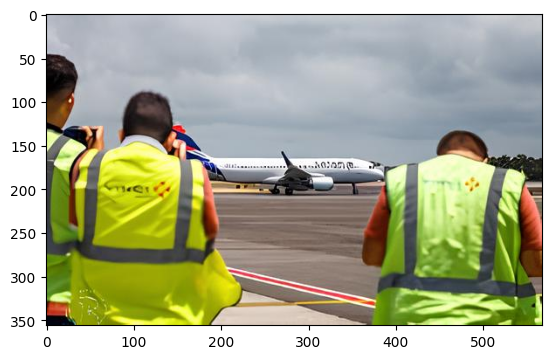

In [136]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('aviao.jpg'))

## Monta Base Analítica de Acidentes Aeronáuticos para Estudos

Dados de ocorrências aeronáuticas da aviação civil brasileira.
- https://dados.gov.br/dados/conjuntos-dados/ocorrencias-aeronauticas-da-aviacao-civil-brasileira

Opendata AIG Brazil
A base de dados de ocorrências aeronáuticas contém os dados sobre as aeronaves envolvidas, fatalidades, local, data, horário dos eventos e informações taxonômicas típicas das investigações de acidentes (AIG). São resguardadas a privacidade de pessoas físicas/jurídicas envolvidas conforme previsto pela Lei de Acesso à Informação (Lei n° 12.527, de 18 de novembro de 2011).

Essa base de dados é composta por informações preliminares provenientes do formulário CENIPA-05 (Ficha de Notificação de Ocorrências Aeronáuticas) e consolidada a partir dos relatórios de investigações publicados. Outra forma de visualização desses dados é pelo [__*Painel SIPAER*__](https://painelsipaer.cenipa.fab.mil.br/QvAJAXZfc/opendoc.htm?document=SIGAER%2Fgia%2Fqvw%2Fpainel_sipaer.qvw&host=QVS%40cirros31-37&anonymous=true) disponível na página do CENIPA.

Tabelas (arquivos)
- OCORRÊNCIA.csv - Informações sobre as ocorrências.
- OCORRÊNCIA_TIPO.csv - Informações sobre o tipo de ocorrência.
- AERONAVE.csv - Informações sobre as aeronaves envolvidas nas ocorrências.
- FATOR_CONTRIBUINTE.csv - Informações sobre os fatores contribuinte das ocorrências que tiveram investigações finalizadas.
- RECOMENDAÇÃO.csv - Informações sobre as recomendações de segurança geradas nas ocorrências.

Este projeto visa acessar as bases de dados de acidentes aeronáuticos do cenipa, fazer a limpeza e o tratamento dos dados, selecionar as colunas dos dados relevantes para pesquisa, deixando uma base analítica única para servir de estudo para outros projetos.

## Faz a limpeza dos dados e os devidos tratamentos iniciais, junta os dataframes em um dataset analítico

In [137]:
# importa bibliotecas
import pandas as pd
from pandasql import sqldf

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [138]:
# carrega arquivos em dataframes
df_aeronave = pd.read_csv('arquivos/aeronave.csv', sep=';', encoding='latin-1')
df_fator_contribuinte = pd.read_csv('arquivos/fator_contribuinte.csv', sep=';', encoding='latin-1')
df_ocorrencia_tipo = pd.read_csv('arquivos/ocorrencia_tipo.csv', sep=';', encoding='latin-1')
df_ocorrencia = pd.read_csv('arquivos/ocorrencia.csv', sep=';', encoding='latin-1')
df_recomendacao = pd.read_csv('arquivos/recomendacao.csv', sep=';', encoding='latin-1')

In [139]:
# verifica o tamanho dos dataframes
display('df_aeronave', df_aeronave.shape)
display('df_fator_contribuinte', df_fator_contribuinte.shape)
display('df_ocorrencia_tipo', df_ocorrencia_tipo.shape)
display('df_ocorrencia', df_ocorrencia.shape)
display('df_recomendacao', df_recomendacao.shape)

'df_aeronave'

(9926, 23)

'df_fator_contribuinte'

(8065, 5)

'df_ocorrencia_tipo'

(10284, 4)

'df_ocorrencia'

(9821, 22)

'df_recomendacao'

(3481, 9)

In [140]:
# visualiza as colunas dos dataframes, verifica tipo de dados
display('df_aeronave', df_aeronave.info())
display('df_fator_contribuinte', df_fator_contribuinte.info())
display('df_ocorrencia_tipo', df_ocorrencia_tipo.info())
display('df_ocorrencia', df_ocorrencia.info())
display('df_recomendacao', df_recomendacao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9926 entries, 0 to 9925
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   codigo_ocorrencia2           9926 non-null   int64  
 1   aeronave_matricula           9926 non-null   object 
 2   aeronave_operador_categoria  9926 non-null   object 
 3   aeronave_tipo_veiculo        9926 non-null   object 
 4   aeronave_fabricante          9925 non-null   object 
 5   aeronave_modelo              9924 non-null   object 
 6   aeronave_tipo_icao           9925 non-null   object 
 7   aeronave_motor_tipo          9813 non-null   object 
 8   aeronave_motor_quantidade    9926 non-null   object 
 9   aeronave_pmd                 9926 non-null   int64  
 10  aeronave_pmd_categoria       9926 non-null   int64  
 11  aeronave_assentos            9472 non-null   float64
 12  aeronave_ano_fabricacao      9623 non-null   float64
 13  aeronave_pais_fabr

'df_aeronave'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8065 entries, 0 to 8064
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   codigo_ocorrencia3   8065 non-null   int64 
 1   fator_nome           8065 non-null   object
 2   fator_aspecto        8065 non-null   object
 3   fator_condicionante  8065 non-null   object
 4   fator_area           8065 non-null   object
dtypes: int64(1), object(4)
memory usage: 315.2+ KB


'df_fator_contribuinte'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10284 entries, 0 to 10283
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   codigo_ocorrencia1         10284 non-null  int64 
 1   ocorrencia_tipo            10284 non-null  object
 2   ocorrencia_tipo_categoria  10284 non-null  object
 3   taxonomia_tipo_icao        10284 non-null  object
dtypes: int64(1), object(3)
memory usage: 321.5+ KB


'df_ocorrencia_tipo'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   codigo_ocorrencia               9821 non-null   int64 
 1   codigo_ocorrencia1              9821 non-null   int64 
 2   codigo_ocorrencia2              9821 non-null   int64 
 3   codigo_ocorrencia3              9821 non-null   int64 
 4   codigo_ocorrencia4              9821 non-null   int64 
 5   ocorrencia_classificacao        9821 non-null   object
 6   ocorrencia_latitude             7240 non-null   object
 7   ocorrencia_longitude            7240 non-null   object
 8   ocorrencia_cidade               9821 non-null   object
 9   ocorrencia_uf                   9821 non-null   object
 10  ocorrencia_pais                 9821 non-null   object
 11  ocorrencia_aerodromo            9821 non-null   object
 12  ocorrencia_dia                  9821 non-null   

'df_ocorrencia'

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3481 entries, 0 to 3480
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   codigo_ocorrencia4               3481 non-null   int64 
 1   recomendacao_numero              3481 non-null   object
 2   recomendacao_dia_assinatura      3481 non-null   object
 3   recomendacao_dia_encaminhamento  3481 non-null   object
 4   recomendacao_dia_feedback        2720 non-null   object
 5   recomendacao_conteudo            3481 non-null   object
 6   recomendacao_status              3481 non-null   object
 7   recomendacao_destinatario_sigla  3481 non-null   object
 8   recomendacao_destinatario        3481 non-null   object
dtypes: int64(1), object(8)
memory usage: 244.9+ KB


'df_recomendacao'

None

In [141]:
# visualiza primeiras linhas dos dataframes
df_aeronave.head(1)

,codigo_ocorrencia2,aeronave_matricula,aeronave_operador_categoria,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total
0,83097,PRHDB,***,HELICÓPTERO,ROBINSON HELICOPTER,R44,R44,PISTÃO,MONOMOTOR,1088,1088,4.0,2001.0,BRASIL,BRASIL,HELICÓPTERO,PARTICULAR,CAMPO DE MARTE - SP,MAROUM,CRUZEIRO,***,SUBSTANCIAL,4


In [142]:
# visualiza primeiras linhas dos dataframes
df_ocorrencia_tipo.head(1)

,codigo_ocorrencia1,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao
0,83097,INDETERMINADO,INDETERMINADO,UNK


In [143]:
# visualiza primeiras linhas dos dataframes
df_fator_contribuinte.head(1)

,codigo_ocorrencia3,fator_nome,fator_aspecto,fator_condicionante,fator_area
0,81624,APLICAÇÃO DE COMANDOS,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL


In [144]:
# visualiza primeiras linhas dos dataframes
df_recomendacao.head(1)

,codigo_ocorrencia4,recomendacao_numero,recomendacao_dia_assinatura,recomendacao_dia_encaminhamento,recomendacao_dia_feedback,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,81172,IG-143/CENIPA/2022 - 01,2023-11-22,2023-11-27,NaN,Avaliar a pertinência de revisar a ICA 100-37 ...,AGUARDANDO RESPOSTA,DECEA,DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO


In [145]:
# visualiza primeiras linhas dos dataframes
df_ocorrencia.head(1)

,codigo_ocorrencia,codigo_ocorrencia1,codigo_ocorrencia2,codigo_ocorrencia3,codigo_ocorrencia4,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,83097,83097,83097,83097,83097,ACIDENTE,-2.352.777.777.777,-4.563.944.444.444,PARAIBUNA,SP,BRASIL,***,31/12/2023,18:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO


In [146]:
# verifica códigos duplicados nos datasets
display('df_aeronave', df_aeronave.duplicated(subset=['codigo_ocorrencia2']).value_counts())
display('df_ocorrencia_tipo', df_ocorrencia_tipo.duplicated(subset=['codigo_ocorrencia1']).value_counts())
display('df_fator_contribuinte', df_fator_contribuinte.duplicated(subset=['codigo_ocorrencia3']).value_counts())
display('df_recomendacao', df_recomendacao.duplicated(subset=['codigo_ocorrencia4']).value_counts())

'df_aeronave'

False    9821
True      105
Name: count, dtype: int64

'df_ocorrencia_tipo'

False    9821
True      463
Name: count, dtype: int64

'df_fator_contribuinte'

True     6085
False    1980
Name: count, dtype: int64

'df_recomendacao'

True     2223
False    1258
Name: count, dtype: int64

In [147]:
# apaga códigos duplicados nos datasets
df_aeronave = df_aeronave.drop_duplicates(subset=['codigo_ocorrencia2'], keep='last')
df_ocorrencia_tipo = df_ocorrencia_tipo.drop_duplicates(subset=['codigo_ocorrencia1'], keep='last')
df_fator_contribuinte = df_fator_contribuinte.drop_duplicates(subset=['codigo_ocorrencia3'], keep='last')
df_recomendacao = df_recomendacao.drop_duplicates(subset=['codigo_ocorrencia4'], keep='last')

In [148]:
# verifica se ficou algum código duplicado
display('df_aeronave', df_aeronave.duplicated(subset=['codigo_ocorrencia2']).value_counts())
display('df_ocorrencia_tipo', df_ocorrencia_tipo.duplicated(subset=['codigo_ocorrencia1']).value_counts())
display('df_fator_contribuinte', df_fator_contribuinte.duplicated(subset=['codigo_ocorrencia3']).value_counts())
display('df_recomendacao', df_recomendacao.duplicated(subset=['codigo_ocorrencia4']).value_counts())

'df_aeronave'

False    9821
Name: count, dtype: int64

'df_ocorrencia_tipo'

False    9821
Name: count, dtype: int64

'df_fator_contribuinte'

False    1980
Name: count, dtype: int64

'df_recomendacao'

False    1258
Name: count, dtype: int64

In [149]:
# junta os dados selecionados na base analítica de acidentes
df_acidentes = sqldf('select oc.ocorrencia_classificacao, oc.ocorrencia_cidade, oc.ocorrencia_uf, oc.ocorrencia_pais, oc.ocorrencia_aerodromo, ' \
                     '       oc.ocorrencia_dia, oc.ocorrencia_hora, oc.investigacao_status, oc.total_aeronaves_envolvidas, oc.ocorrencia_saida_pista, ' \
                     '       oc.ocorrencia_latitude, oc.ocorrencia_longitude, ' \

                     '       ae.aeronave_matricula, ae.aeronave_tipo_veiculo, ae.aeronave_fabricante, ae.aeronave_modelo, ' \
                     '       ae.aeronave_tipo_icao, ae.aeronave_motor_tipo, ae.aeronave_motor_quantidade, ae.aeronave_pmd, ae.aeronave_pmd_categoria, ' \
                     '       ae.aeronave_assentos, ae.aeronave_ano_fabricacao, ae.aeronave_pais_fabricante, ae.aeronave_pais_registro, ae.aeronave_registro_categoria, ' \
                     '       ae.aeronave_registro_segmento, ae.aeronave_voo_origem, ae.aeronave_voo_destino, ae.aeronave_fase_operacao, ae.aeronave_tipo_operacao, ' \
                     '       ae.aeronave_nivel_dano, ae.aeronave_fatalidades_total, ' \
                     
                     '       ot.ocorrencia_tipo, ot.ocorrencia_tipo_categoria, ot.taxonomia_tipo_icao, ' \
                     
                     '       fc.fator_nome, fc.fator_aspecto, fc.fator_condicionante, fc.fator_area, ' \
                     
                     '       re.recomendacao_conteudo, re.recomendacao_status, re.recomendacao_destinatario_sigla, ' \
                     '       re.recomendacao_destinatario ' \
                     
                     'from df_ocorrencia oc ' \
                     'left join df_aeronave ae on (ae.codigo_ocorrencia2 = oc.codigo_ocorrencia2) ' \
                     'left join df_ocorrencia_tipo ot on (ot.codigo_ocorrencia1 = oc.codigo_ocorrencia1) ' \
                     'left join df_fator_contribuinte fc on (fc.codigo_ocorrencia3 = oc.codigo_ocorrencia3) ' \
                     'left join df_recomendacao re on (re.codigo_ocorrencia4 = oc.codigo_ocorrencia4) ' \
                     
                     'order by oc.ocorrencia_dia, oc.ocorrencia_hora'
                     
                     )

In [150]:
# verifica as primeiras linhas do novo dataframe
df_acidentes.head(3)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,01/01/2007,00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,None,None,None,None,None,None,None,None
1,INCIDENTE,LONDRINA,PR,BRASIL,***,01/01/2007,21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,None,None,None,None,None,None,None,None
2,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,15:35:00,FINALIZADA,1,NÃO,-235.694.444.444,-462.702.777.778,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Dar ampla divulgação aos operadores de aeronav...,***,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...


In [151]:
# verifica o tipo de variáveis
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9821 non-null   object 
 1   ocorrencia_cidade                9821 non-null   object 
 2   ocorrencia_uf                    9821 non-null   object 
 3   ocorrencia_pais                  9821 non-null   object 
 4   ocorrencia_aerodromo             9821 non-null   object 
 5   ocorrencia_dia                   9821 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8407 non-null   object 
 8   total_aeronaves_envolvidas       9821 non-null   int64  
 9   ocorrencia_saida_pista           9821 non-null   object 
 10  ocorrencia_latitude              7240 non-null   object 
 11  ocorrencia_longitude             7240 non-null   object 
 12  aeronave_matricula  

In [152]:
# verifica os registros duplicados
df_acidentes.duplicated().sum()

2

In [153]:
# elimina os registros duplicados
df_acidentes = df_acidentes.drop_duplicates(keep='last')

In [154]:
# monta período com a hora
def monta_periodo(ts):
    if (ts.hour > 6) and (ts.hour < 12):
        return '06:00 às 12:00'
    elif (ts.hour > 12) and (ts.hour < 18):
        return '12:00 às 18:00'
    elif (ts.hour > 18):
        return '18:00 às 00:00'    
    else:
        return '00:00 às 06:00'

In [155]:
# separa e cria período
df_acidentes['ocorrencia_hora'] = pd.to_datetime(
    df_acidentes.ocorrencia_hora.loc[(df_acidentes['ocorrencia_hora'] != '99:99:99')])
df_acidentes['periodo'] = df_acidentes['ocorrencia_hora'].apply(monta_periodo)
display(df_acidentes.info())
display(df_acidentes.head(3))

<class 'pandas.core.frame.DataFrame'>
Index: 9819 entries, 0 to 9820
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ocorrencia_classificacao         9819 non-null   object        
 1   ocorrencia_cidade                9819 non-null   object        
 2   ocorrencia_uf                    9819 non-null   object        
 3   ocorrencia_pais                  9819 non-null   object        
 4   ocorrencia_aerodromo             9819 non-null   object        
 5   ocorrencia_dia                   9819 non-null   object        
 6   ocorrencia_hora                  9817 non-null   datetime64[ns]
 7   investigacao_status              8405 non-null   object        
 8   total_aeronaves_envolvidas       9819 non-null   int64         
 9   ocorrencia_saida_pista           9819 non-null   object        
 10  ocorrencia_latitude              7238 non-null   object        
 

None

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,01/01/2007,2024-05-16 00:00:00,None,1,NÃO,None,None,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,None,None,None,None,None,None,None,None,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,01/01/2007,2024-05-16 21:10:00,None,1,NÃO,None,None,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,None,None,None,None,None,None,None,None,18:00 às 00:00
2,ACIDENTE,MOGI DAS CRUZES,SP,BRASIL,***,01/01/2009,2024-05-16 15:35:00,FINALIZADA,1,NÃO,-235.694.444.444,-462.702.777.778,PTLDO,AVIÃO,NORTH AMERICAN,AT-6D,T6,PISTÃO,MONOMOTOR,2404,2404,2.0,1942.0,BRASIL,BRASIL,AVIÃO,ESPECIALIZADA,CAMPO DE MARTE - SP,SANTOS DUMONT,ESPECIALIZADA,ESPECIALIZADA,SUBSTANCIAL,0,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR | FALHA DO...,SCF-PP,SUPERVISÃO GERENCIAL,DESEMPENHO DO SER HUMANO,OPERAÇÃO DA AERONAVE,FATOR OPERACIONAL,Dar ampla divulgação aos operadores de aeronav...,***,ABAAC,ASSOCIAÇÃO BRASILEIRA DE AERONAVES ANTIGAS E C...,12:00 às 18:00


In [156]:
# elimina nulos movendo um valor padrão para dados de ocorrências
df_acidentes.ocorrencia_tipo[df_acidentes.ocorrencia_tipo.isnull()] = '***'
df_acidentes.ocorrencia_saida_pista[df_acidentes.ocorrencia_saida_pista.isnull()] = '***'
df_acidentes.ocorrencia_aerodromo[df_acidentes.ocorrencia_aerodromo.isnull()] = '***'
df_acidentes.ocorrencia_classificacao[df_acidentes.ocorrencia_classificacao.isnull()] = '***'
df_acidentes.ocorrencia_uf[df_acidentes.ocorrencia_uf.isnull()] = '***'
df_acidentes.ocorrencia_cidade[df_acidentes.ocorrencia_cidade.isnull()] = '***'
df_acidentes.ocorrencia_hora[df_acidentes.ocorrencia_hora.isnull()] = '99:99:99'
df_acidentes.ocorrencia_dia[df_acidentes.ocorrencia_dia.isnull()] = '01/01/1900'
df_acidentes.total_aeronaves_envolvidas[df_acidentes.total_aeronaves_envolvidas.isnull()] = 0
df_acidentes.aeronave_fatalidades_total[df_acidentes.aeronave_fatalidades_total.isnull()] = 0

In [157]:
# verifica quantidade de cada categoria
display(df_acidentes.ocorrencia_tipo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_saida_pista.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_aerodromo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_classificacao.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_uf.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_cidade.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_hora.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.ocorrencia_dia.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.total_aeronaves_envolvidas.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_fatalidades_total.value_counts().sort_values(ascending=False).head(5))

ocorrencia_tipo
FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPONENTE    1197
COLISÃO COM AVE                                       1180
FALHA DO MOTOR EM VOO                                 1107
ESTOURO DE PNEU                                        887
PERDA DE CONTROLE NO SOLO                              673
Name: count, dtype: int64

ocorrencia_saida_pista
NÃO    9062
SIM     757
Name: count, dtype: int64

ocorrencia_aerodromo
***     3124
SBGR     341
SBKP     248
**NI     222
SBGL     202
Name: count, dtype: int64

ocorrencia_classificacao
INCIDENTE          6160
ACIDENTE           2601
INCIDENTE GRAVE    1058
Name: count, dtype: int64

ocorrencia_uf
SP    2385
RJ     873
MG     864
PR     768
RS     591
Name: count, dtype: int64

ocorrencia_cidade
RIO DE JANEIRO    599
SÃO PAULO         521
GUARULHOS         357
CAMPINAS          351
BELO HORIZONTE    274
Name: count, dtype: int64

ocorrencia_hora
2024-05-16 00:00:00    271
2024-05-16 20:00:00    171
2024-05-16 19:00:00    153
2024-05-16 13:30:00    135
2024-05-16 12:00:00    130
Name: count, dtype: int64

ocorrencia_dia
24/11/2023    16
26/11/2023    14
27/11/2023    14
08/11/2023    13
29/11/2023    12
Name: count, dtype: int64

total_aeronaves_envolvidas
1    9719
2      96
3       3
4       1
Name: count, dtype: int64

aeronave_fatalidades_total
0    9216
1     307
2     164
3      45
4      40
Name: count, dtype: int64

In [158]:
# elimina nulos movendo um valor padrão para dados de aeronaves
df_acidentes.aeronave_tipo_veiculo[df_acidentes.aeronave_tipo_veiculo.isnull()] = '***'
df_acidentes.aeronave_fabricante[df_acidentes.aeronave_fabricante.isnull()] = '***'
df_acidentes.aeronave_modelo[df_acidentes.aeronave_modelo.isnull()] = '***'
df_acidentes.aeronave_motor_tipo[df_acidentes.aeronave_motor_tipo.isnull()] = '***'
df_acidentes.aeronave_motor_quantidade[df_acidentes.aeronave_motor_quantidade.isnull()] = '0'
df_acidentes.aeronave_assentos[df_acidentes.aeronave_assentos.isnull()] = 0
df_acidentes.aeronave_ano_fabricacao[df_acidentes.aeronave_ano_fabricacao.isnull()] = 1900
df_acidentes.aeronave_pais_fabricante[df_acidentes.aeronave_pais_fabricante.isnull()] = '***'
df_acidentes.aeronave_pais_registro[df_acidentes.aeronave_pais_registro.isnull()] = 0
df_acidentes.aeronave_registro_categoria[df_acidentes.aeronave_registro_categoria.isnull()] = '***'
df_acidentes.aeronave_registro_segmento[df_acidentes.aeronave_registro_segmento.isnull()] = '***'
df_acidentes.aeronave_voo_origem[df_acidentes.aeronave_voo_origem.isnull()] = '***'
df_acidentes.aeronave_voo_destino[df_acidentes.aeronave_voo_destino.isnull()] = '***'
df_acidentes.aeronave_fase_operacao[df_acidentes.aeronave_fase_operacao.isnull()] = '***'
df_acidentes.aeronave_tipo_operacao[df_acidentes.aeronave_tipo_operacao.isnull()] = '***'
df_acidentes.aeronave_nivel_dano[df_acidentes.aeronave_nivel_dano.isnull()] = '***'

In [159]:
# verifica quantidade de cada categoria
display(df_acidentes.aeronave_tipo_veiculo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_fabricante.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_modelo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_motor_tipo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_motor_quantidade.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_assentos.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_ano_fabricacao.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_pais_fabricante.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_pais_registro.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_registro_categoria.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_registro_segmento.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_voo_origem.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_voo_destino.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_fase_operacao.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_tipo_operacao.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.aeronave_nivel_dano.value_counts().sort_values(ascending=False).head(5))

aeronave_tipo_veiculo
AVIÃO          8250
HELICÓPTERO     943
ULTRALEVE       402
***             169
PLANADOR         27
Name: count, dtype: int64

aeronave_fabricante
CESSNA AIRCRAFT                1337
EMBRAER                        1155
NEIVA INDUSTRIA AERONAUTICA     993
BOEING COMPANY                  779
AIRBUS INDUSTRIE                777
Name: count, dtype: int64

aeronave_modelo
ATR-72-212A        309
AB-115             284
ERJ 190-200 IGW    280
737-8EH            274
EMB-810D           244
Name: count, dtype: int64

aeronave_motor_tipo
PISTÃO        4743
JATO          2532
TURBOÉLICE    1236
TURBOEIXO      792
***            489
Name: count, dtype: int64

aeronave_motor_quantidade
BIMOTOR       4861
MONOMOTOR     4332
SEM TRAÇÃO     318
***            163
TRIMOTOR       128
Name: count, dtype: int64

aeronave_assentos
6.0    1393
2.0    1218
0.0    1165
4.0    1005
1.0     852
Name: count, dtype: int64

aeronave_ano_fabricacao
0.0       658
2010.0    368
2012.0    365
2008.0    347
2009.0    321
Name: count, dtype: int64

aeronave_pais_fabricante
BRASIL              9628
ESTADOS UNIDOS        88
NÃO IDENTIFICADO      14
CHILE                 13
PORTUGAL              10
Name: count, dtype: int64

aeronave_pais_registro
BRASIL              9628
ESTADOS UNIDOS        88
NÃO IDENTIFICADO      14
CHILE                 13
PORTUGAL              10
Name: count, dtype: int64

aeronave_registro_categoria
AVIÃO          8250
HELICÓPTERO     943
ULTRALEVE       402
***             169
PLANADOR         27
Name: count, dtype: int64

aeronave_registro_segmento
REGULAR         2810
PARTICULAR      2629
TÁXI AÉREO      1185
INSTRUÇÃO       1162
EXPERIMENTAL     565
Name: count, dtype: int64

aeronave_voo_origem
FORA DE AERODROMO                  4141
GOVERNADOR ANDRÉ FRANCO MONTORO     248
VIRACOPOS                           235
NÃO IDENTIFICADO                    234
CONGONHAS                           188
Name: count, dtype: int64

aeronave_voo_destino
FORA DE AERODROMO                  4268
NÃO IDENTIFICADO                    251
GOVERNADOR ANDRÉ FRANCO MONTORO     220
CONGONHAS                           188
VIRACOPOS                           166
Name: count, dtype: int64

aeronave_fase_operacao
POUSO                 1797
DECOLAGEM             1646
CRUZEIRO              1359
CORRIDA APÓS POUSO     951
SUBIDA                 732
Name: count, dtype: int64

aeronave_tipo_operacao
REGULAR       2966
PRIVADA       2888
TÁXI AÉREO    1168
INSTRUÇÃO     1094
AGRÍCOLA       700
Name: count, dtype: int64

aeronave_nivel_dano
NENHUM         3893
LEVE           2782
SUBSTANCIAL    2216
DESTRUÍDA       498
***             430
Name: count, dtype: int64

In [160]:
# elimina nulos movendo um valor padrão para dados de fatores e recomendações
df_acidentes.fator_nome[df_acidentes.fator_nome.isnull()] = '***'
df_acidentes.fator_aspecto[df_acidentes.fator_aspecto.isnull()] = '***'
df_acidentes.fator_condicionante[df_acidentes.fator_condicionante.isnull()] = '***'
df_acidentes.fator_area[df_acidentes.fator_area.isnull()] = '***'
df_acidentes.recomendacao_conteudo[df_acidentes.recomendacao_conteudo.isnull()] = '***'
df_acidentes.recomendacao_status[df_acidentes.recomendacao_status.isnull()] = '***'
df_acidentes.recomendacao_destinatario[df_acidentes.recomendacao_destinatario.isnull()] = '***'
df_acidentes.recomendacao_destinatario_sigla[df_acidentes.recomendacao_destinatario_sigla.isnull()] = '***'

In [161]:
# verifica quantidade de cada categoria
display(df_acidentes.fator_nome.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.fator_aspecto.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.fator_condicionante.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.fator_area.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.recomendacao_conteudo.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.recomendacao_status.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.recomendacao_destinatario.value_counts().sort_values(ascending=False).head(5))
display(df_acidentes.recomendacao_destinatario_sigla.value_counts().sort_values(ascending=False).head(5))

fator_nome
***                        7839
SUPERVISÃO GERENCIAL        616
PROCESSO DECISÓRIO          245
PLANEJAMENTO DE VOO         183
JULGAMENTO DE PILOTAGEM     174
Name: count, dtype: int64

fator_aspecto
***                         7839
DESEMPENHO DO SER HUMANO    1376
ASPECTO PSICOLÓGICO          415
OUTRO                         98
ASPECTO DE PROJETO            26
Name: count, dtype: int64

fator_condicionante
***                       8028
OPERAÇÃO DA AERONAVE      1213
INDIVIDUAL                 310
MANUTENÇÃO DA AERONAVE     159
ORGANIZACIONAL              88
Name: count, dtype: int64

fator_area
***                  7839
FATOR OPERACIONAL    1415
FATOR HUMANO          433
OUTRO                  98
FATOR MATERIAL         34
Name: count, dtype: int64

recomendacao_conteudo
***                                                                                                                                                                                                 8561
Divulgar o conteúdo do presente relatório durante a realização de seminários, palestras e atividades afins voltadas aos proprietários, operadores e exploradores de aeronaves.                         6
Divulgar o conteúdo do presente relatório durante a realização de seminários, palestras e atividades afins voltadas aos proprietários, operadores e exploradores de aeronaves de asas rotativas.       5
Divulgar o conteúdo do presente relatório durante a realização de seminários, palestras e atividades afins voltadas aos proprietários, operadores e exploradores de aeronaves agrícolas.               4
Tendo em vista as condições latentes listadas no conteúdo deste relatório, intensificar as ações de fiscalização no operador da aeronave acidentada.                          

recomendacao_status
***                             8660
ADOTADA                          979
ADOTADA DE FORMA ALTERNATIVA      78
NÃO ADOTADA                       54
AGUARDANDO RESPOSTA               47
Name: count, dtype: int64

recomendacao_destinatario
***                                                                                8561
AGÊNCIA NACIONAL DE AVIAÇÃO CIVIL                                                  1041
DEPARTAMENTO DE CONTROLE DE ESPAÇO AÉREO                                             45
PRIMEIRO SERVIÇO REGIONAL DE INVESTIGAÇÃO E PREVENÇÃO DE ACIDENTES AERONÁUTICOS      37
SINDICATO NACIONAL DAS EMPRESAS DE AVIAÇÃO AGRÍCOLA                                  15
Name: count, dtype: int64

recomendacao_destinatario_sigla
***         8561
ANAC        1041
DECEA         45
SERIPA-1      37
SINDAG        15
Name: count, dtype: int64

In [162]:
# converte a data ocorrencia_dia para ano-mes-dia
def converte_data(datax):
    return (datax[6:10] + '/' + datax[3:5] + '/' + datax[0:2])

In [163]:
# modifica data ocorrencia_dia
df_acidentes['ocorrencia_dia'] = df_acidentes['ocorrencia_dia'].apply(converte_data)

In [164]:
# converte type para datetime
df_acidentes['ocorrencia_dia'] = pd.to_datetime(df_acidentes['ocorrencia_dia'])

In [165]:
# verifica o type do ocorrencia_dia
df_acidentes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9819 entries, 0 to 9820
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   ocorrencia_classificacao         9819 non-null   object        
 1   ocorrencia_cidade                9819 non-null   object        
 2   ocorrencia_uf                    9819 non-null   object        
 3   ocorrencia_pais                  9819 non-null   object        
 4   ocorrencia_aerodromo             9819 non-null   object        
 5   ocorrencia_dia                   9819 non-null   datetime64[ns]
 6   ocorrencia_hora                  9819 non-null   object        
 7   investigacao_status              8405 non-null   object        
 8   total_aeronaves_envolvidas       9819 non-null   int64         
 9   ocorrencia_saida_pista           9819 non-null   object        
 10  ocorrencia_latitude              7238 non-null   object        
 

In [166]:
# retira os pontos da latitude e longitude
def retira_pontos(latlong):

    latlong = str(latlong)
    latlong = latlong.strip()

    if (latlong in ('Nan', 'nan', 'None', '***')) | \
        (type(latlong)=="<class 'str'"):
        latlong = '0'
    else:
        latlong = str(latlong)
        latlong = latlong.replace('.', '')
        latlong = latlong.replace(' ', '')
        latlong = latlong.replace(',', '')
        latlong = latlong.replace('\\t', '')
        latlong = latlong.replace('\t', '')
        latlong = latlong.replace(',', '')
        latlong = latlong.replace('*', '')
        latlong = latlong.replace('°', '')
        latlong = latlong.replace('--', '')

        if len(latlong) == 0:
            latlong = 0
        else:
            if latlong[0:1] == '-':
                latlong = latlong[0:3] + '.' + latlong[3:20]
            else:
                latlong = latlong[0:2] + '.' + latlong[2:20]

    latlong = float(latlong)
    return latlong

In [167]:
# chama retira_pontos
df_acidentes['ocorrencia_latitude'] = df_acidentes['ocorrencia_latitude'].apply(retira_pontos)
df_acidentes['ocorrencia_longitude'] = df_acidentes['ocorrencia_longitude'].apply(retira_pontos)

In [168]:
# verifica o tamanho do dataframe
df_acidentes.shape

(9819, 45)

In [169]:
# salva os dados juntados em arquivo csv
df_acidentes.sort_values(by=["ocorrencia_dia"]).to_csv('arquivos_tratados/df_acidentes_aeronauticos.csv', index=False)